In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('data/preprocessed_data.csv')
data.head(5)

,User-ID,Book-Rating,Book-Author,Year-Of-Publication,Location,Age,raw_title,categories
0,2313,7,raybradbury,1984.0,usa,23.0,themartianchronicles,fiction
1,2313,8,johnokada,1978.0,usa,23.0,nonoboy,japanese
2,6543,8,raybradbury,1976.0,usa,34.0,fahrenheit451,bookburning
3,6543,9,jamespatterson,2001.0,usa,34.0,1sttodieanovel,fiction
4,6543,6,alexandermccallsmith,2002.0,usa,34.0,theno1ladiesdetectiveagency,botswana


In [3]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Year-Of-Publication'] = data['Year-Of-Publication'].fillna(data['Year-Of-Publication'].median())

In [4]:
scaler = StandardScaler()
data['Age'] = scaler.fit_transform(np.array(data['Age']).reshape(-1, 1))
data['Year-Of-Publication'] = scaler.fit_transform(np.array(data['Year-Of-Publication']).reshape(-1, 1))
data.head(5)

,User-ID,Book-Rating,Book-Author,Year-Of-Publication,Location,Age,raw_title,categories
0,2313,7,raybradbury,-0.670241,usa,-1.171054,themartianchronicles,fiction
1,2313,8,johnokada,-1.207090,usa,-1.171054,nonoboy,japanese
2,6543,8,raybradbury,-1.386040,usa,-0.227732,fahrenheit451,bookburning
3,6543,9,jamespatterson,0.850831,usa,-0.227732,1sttodieanovel,fiction
4,6543,6,alexandermccallsmith,0.940306,usa,-0.227732,theno1ladiesdetectiveagency,botswana


In [5]:
cut_data = data[['User-ID', 'raw_title', 'Book-Rating', 'Year-Of-Publication', 'Age']]
cut_data.head(5)

,User-ID,raw_title,Book-Rating,Year-Of-Publication,Age
0,2313,themartianchronicles,7,-0.670241,-1.171054
1,2313,nonoboy,8,-1.207090,-1.171054
2,6543,fahrenheit451,8,-1.386040,-0.227732
3,6543,1sttodieanovel,9,0.850831,-0.227732
4,6543,theno1ladiesdetectiveagency,6,0.940306,-0.227732


In [6]:
label_encoder = LabelEncoder()
cut_data['raw_title'] = label_encoder.fit_transform(cut_data['raw_title'])
cut_data.head(5)

C:\Users\79237\AppData\Local\Temp\ipykernel_2572\2909744414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data['raw_title'] = label_encoder.fit_transform(cut_data['raw_title'])


,User-ID,raw_title,Book-Rating,Year-Of-Publication,Age
0,2313,11266,7,-0.670241,-1.171054
1,2313,7036,8,-1.207090,-1.171054
2,6543,3469,8,-1.386040,-0.227732
3,6543,39,9,0.850831,-0.227732
4,6543,11466,6,0.940306,-0.227732


In [7]:
cut_data = cut_data.rename(columns={'User-ID': 'user-id', 'raw_title': 'book-id', 'Book-Rating': 'rating', 'Age': 'age', 'Year-Of-Publication': 'year'})
cut_data.head(5)

,user-id,book-id,rating,year,age
0,2313,11266,7,-0.670241,-1.171054
1,2313,7036,8,-1.207090,-1.171054
2,6543,3469,8,-1.386040,-0.227732
3,6543,39,9,0.850831,-0.227732
4,6543,11466,6,0.940306,-0.227732


In [8]:
cut_data['rating'] = cut_data['rating'].astype(float)
cut_data.head(5)

,user-id,book-id,rating,year,age
0,2313,11266,7.0,-0.670241,-1.171054
1,2313,7036,8.0,-1.207090,-1.171054
2,6543,3469,8.0,-1.386040,-0.227732
3,6543,39,9.0,0.850831,-0.227732
4,6543,11466,6.0,0.940306,-0.227732


In [9]:
X = cut_data[['user-id', 'book-id', 'year', 'age']]
y = cut_data['rating']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
all_users = X_train['user-id'].unique()
all_books = X_train['book-id'].unique()

In [12]:
user_input = keras.layers.Input(shape=(1,), name="User")
user_as_integer = keras.layers.IntegerLookup(vocabulary=all_users)(user_input)
user_embedding = keras.layers.Embedding(input_dim=len(all_users) + 1, output_dim=32, embeddings_regularizer=keras.regularizers.l2(0.1))(user_as_integer)
user_bias = keras.layers.Embedding(input_dim=len(all_users) + 1, output_dim=1)(user_as_integer)

In [13]:
book_input = keras.layers.Input(shape=(1,), name="Book")
book_as_integer = keras.layers.IntegerLookup(vocabulary=all_books)(book_input)
book_embedding = keras.layers.Embedding(input_dim=len(all_books) + 1, output_dim=32, embeddings_regularizer=keras.regularizers.l2(0.1))(book_as_integer)
book_bias = keras.layers.Embedding(input_dim=len(all_books) + 1, output_dim=1)(book_as_integer)

In [14]:
year_input = keras.layers.Input(shape=(1,), name="Year")
year_dense = keras.layers.Dense(1, activation='relu')(year_input)

In [15]:
age_input = keras.layers.Input(shape=(1,), name="Age")
age_dense = keras.layers.Dense(1, activation='relu')(age_input)

In [16]:
dot_product = keras.layers.Dot(axes=-1)([user_embedding, book_embedding])
add = keras.layers.Add()([dot_product, user_bias, book_bias, year_dense, age_dense])
flatten = keras.layers.Flatten()(add)

In [17]:
output = keras.layers.Lambda(lambda x: 9 * math.sigmoid(x) + 1, name="Rating")(flatten)

In [19]:
model = keras.Model(inputs=[user_input, book_input, year_input, age_input], outputs=output)
model.compile(loss="mse", metrics=[keras.metrics.RootMeanSquaredError])

In [20]:
#keras.utils.plot_model(model, to_file="model.png", show_shapes=True)
#model.save("model.keras")

In [21]:
history = model.fit(x=[X_train['user-id'], X_train['book-id'], X_train['year'], X_train['age']], y=y_train, batch_size=256, epochs=50, validation_split=0.1)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 21.4024 - root_mean_squared_error: 2.4902 - val_loss: 5.0526 - val_root_mean_squared_error: 2.2490
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.5154 - root_mean_squared_error: 2.1245 - val_loss: 3.8902 - val_root_mean_squared_error: 1.9734
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.4946 - root_mean_squared_error: 1.8693 - val_loss: 3.3889 - val_root_mean_squared_error: 1.8420
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.1493 - root_mean_squared_error: 1.7746 - val_loss: 3.2174 - val_root_mean_squared_error: 1.7947
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.0206 - root_mean_squared_error: 1.7379 - val_loss: 3.1618 - val_root_mean_squared_error: 1.7790
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.9275 - root_mean_squared_error: 1.7110 - val_loss: 3.1331 - val_root_mean_squared_error: 1.7709
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11

196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.1282 - root_mean_squared_error: 1.4587 - val_loss: 2.9079 - val_root_mean_squared_error: 1.7058
Epoch 44/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.1122 - root_mean_squared_error: 1.4533 - val_loss: 2.9078 - val_root_mean_squared_error: 1.7058
Epoch 45/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.0726 - root_mean_squared_error: 1.4396 - val_loss: 2.9073 - val_root_mean_squared_error: 1.7056
Epoch 46/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.0838 - root_mean_squared_error: 1.4435 - val_loss: 2.9032 - val_root_mean_squared_error: 1.7044
Epoch 47/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.0980 - root_mean_squared_error: 1.4484 - val_loss: 2.9026 - val_root_mean_squared_error: 1.7042
Epoch 48/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.0406 - root_mean_squared_error: 1.4284 - val_loss: 2.9085 - val_root_mean_squared_error: 1.7059
Epoch 49/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/ste

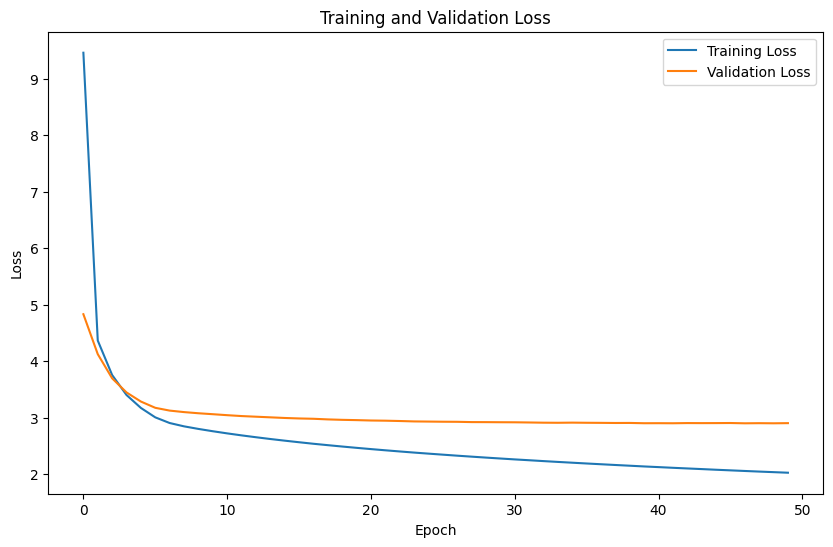

In [20]:
history_df = pd.DataFrame({'loss': history.history['loss'], 'val_loss': history.history['val_loss']}).reset_index(drop=False).rename(columns={'index': 'epoch'})
plt.figure(figsize=(10, 6))
sns.lineplot(x=history_df['epoch'], y=history_df['loss'], label='Training Loss')
sns.lineplot(x=history_df['epoch'], y=history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
test_scores = model.evaluate(x=[X_test['user-id'], X_test['book-id'], X_test['year'], X_test['age']], y=y_test)

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7130 - root_mean_squared_error: 1.6468


In [22]:
r2_score(y_test, np.ravel(model.predict([X_test['user-id'], X_test['book-id'], X_test['year'], X_test['age']])))

436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


0.1561574213770962